In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Raw_housing_data=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
Raw_housing_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


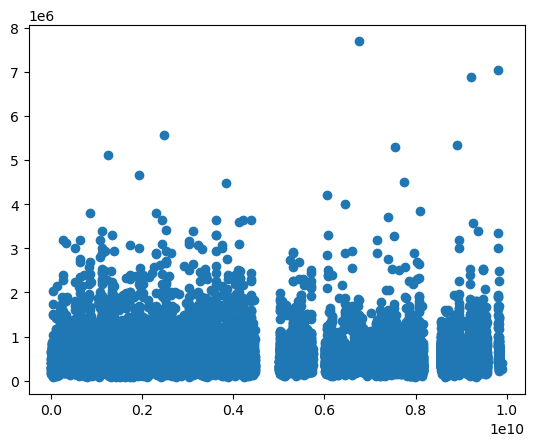

In [4]:
#To identify outliers we plot a scatterplot
plt.scatter(x=Raw_housing_data['ID'],y=Raw_housing_data['Sale Price'])

In [5]:
Raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [6]:
#Mean is much greater than Median so we conclude it is not normally distributed
#here we also see count<total rows so there are null values present which need to be treated

In [7]:
#IQR=Q3-Q1
#lower_limit=q1-1.5*IQR
#upper_limit=q3+1.5*IQR
#If lower limit<minimum value in our data then lower_limit=min(data)
#If upper limit>maximum value in out data then upper_limit=max(data)
#any data point higher than the upper limit and lower than the lower limit is an outlier

In [8]:
#We use Seaborn Library as using matplotlib we cannot ignore the missing values

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Sale Price'>

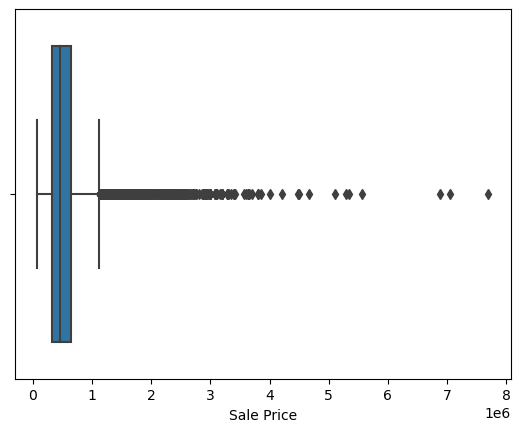

In [10]:
sns.boxplot(x=Raw_housing_data['Sale Price'])

In [11]:
#An outlier may also be cause by false data entry so we need to identify it and fix it
#like A mansion with all facilities might go for 7 million
#but a flat would go for 700k and by mistake while data entry mistake was make
#and it bacame 7million so we need to fix it
#still we need to treat all outliers as it may ruin our model

In [12]:
q1=Raw_housing_data['Sale Price'].quantile(0.25)
q3=Raw_housing_data['Sale Price'].quantile(0.75)

In [13]:
iqr=q3-q1

In [14]:
iqr

323050.0

In [15]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [16]:
#Treating using imputing method
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [17]:
Raw_housing_data['Sale Price']=Raw_housing_data['Sale Price'].apply(limit_imputer)

In [18]:
Raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [19]:
#Mean has become closer to median 
#max value is changed

In [20]:
#Treating Missing values
Raw_housing_data.dropna(inplace=True, axis=0, subset=['Sale Price'])

In [21]:
Raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <BarContainer object of 10 artists>)

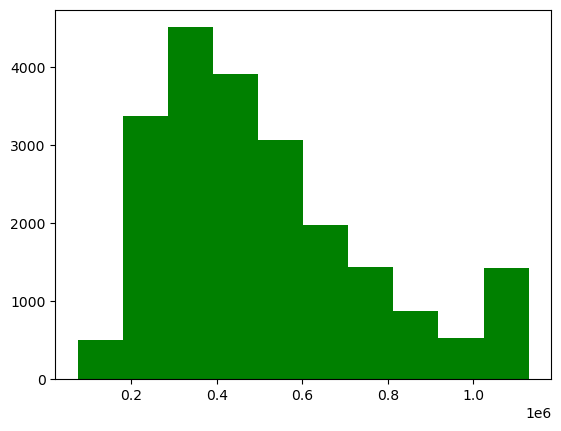

In [22]:
plt.hist(Raw_housing_data['Sale Price'],bins=10,color='green')

In [23]:
#How to treat missing values in independent variables

In [24]:
Raw_housing_data=pd.read_csv('Raw_Housing_prices2.csv')

In [25]:
Raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [26]:
# we see in some coloumns values are missing 
# sp we impute all coloumns at once using imputer class from sklearn

In [27]:
numerical_coloumns=['No of Bathrooms','Flat Area (in Sqft)',
                   'Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)',
                   'Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
Raw_housing_data[numerical_coloumns]=imputer.fit_transform(Raw_housing_data[numerical_coloumns])

In [29]:
Raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [30]:
#Now we reshape the ZipCode which is a categorical coloumn
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Raw_housing_data['Zipcode']=imputer.fit_transform(Raw_housing_data['Zipcode'])

ValueError: Expected 2D array, got 1D array instead:
array=[98178. 98125. 98028. ... 98144. 98027. 98144.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
Raw_housing_data['Zipcode'].shape

(21609,)

In [32]:
#It expects 2d array as we need to reshape it

In [33]:
coloumn=Raw_housing_data['Zipcode'].values.reshape(-1,1)
#-1 means it will adjust rows accordingly, format is reshape(rows,coloumns)
coloumn.shape

(21609, 1)

In [34]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Raw_housing_data['Zipcode']=imputer.fit_transform(coloumn)

C:\Anaconda\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [35]:
Raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [36]:
#We convert zipcode to numerical datatype to find relation with house price

In [37]:
Raw_housing_data['Zipcode']=Raw_housing_data['Zipcode'].astype(object)

In [38]:
Raw_housing_data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [42]:
#Renovated house may also affect price so...
Raw_housing_data['Ever Renovate']=np.where(Raw_housing_data['Renovated Year']==0,'No','Yes')
#if condition is true return first i.e no else yes

In [43]:
Raw_housing_data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [46]:
#To remove some coloumns as we dont need them
Raw_housing_data.drop(columns=[ 'Date House was Sold', 'Renovated Year'],inplace=True)

In [47]:
Raw_housing_data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No


In [49]:
transformed_housing_data=pd.read_csv('Transformed_Housing_Data.csv')

In [52]:
#To find correlation between 2 parameters
transformed_housing_data['Sale Price'].corr(transformed_housing_data['Flat Area (in Sqft)'])
#This is +ve and hence there is strong corelation
#We can also do this using numpy library

0.6951704258420672

In [53]:
#Categorical values are values that are majorly listed down as objects in dtype
transformed_housing_data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

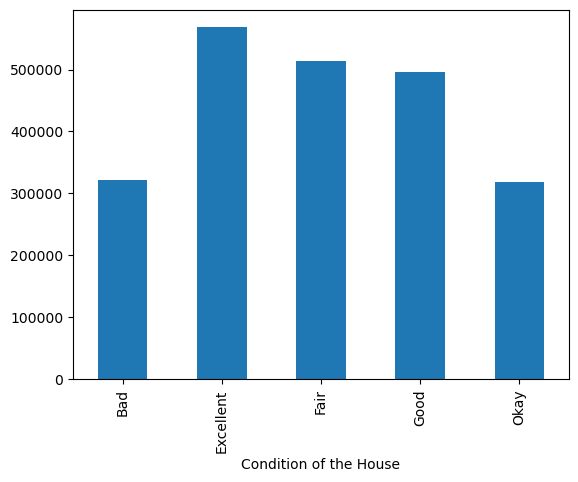

In [58]:
#Now we need to see relationship of categorical variable with target variable
transformed_housing_data.groupby('Condition of the House',)['Sale Price'].mean().plot(kind='bar')

In [60]:
#Anova
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [61]:
transformed_housing_data=transformed_housing_data.rename(columns={'Sale Price':'Sale_Price'})
#As space is not accepted in these library

In [74]:
transformed_housing_data=transformed_housing_data.rename(columns={'Condition of the House':'Condition_of_the_House'})

In [75]:
transformed_housing_data['Condition_of_the_House'].head()

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
Name: Condition_of_the_House, dtype: object

In [76]:
mod=ols('Sale_Price ~ Condition_of_the_House',data=transformed_housing_data).fit()

In [78]:
Annova_Table=sm.stats.anova_lm(mod,type=2)

In [80]:
print(Annova_Table)
#Clearly F value is great and pr value is really less so there is infact relation 
#between Sale Price and COndition of the house

                             df        sum_sq       mean_sq         F  \
Condition_of_the_House      4.0  1.441831e+13  3.604579e+12  58.25563   
Residual                21604.0  1.336752e+15  6.187520e+10       NaN   

                              PR(>F)  
Condition_of_the_House  5.447605e-49  
Residual                         NaN  


In [82]:
#Creating dummy variables
transformed_housing_data=pd.get_dummies(transformed_housing_data,columns=['Condition_of_the_House'],drop_first=True)

In [83]:
transformed_housing_data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [84]:
#We create dummy variable as on assigning differnt numbers model might
#start giving preference to larger numbers or such 

In [85]:
#We create bins if category variable is greater than 20 
#we group the variables and put it in a single bin

In [88]:
transformed_housing_data=pd.read_csv("Transformed_Housing_Data2.csv")

In [89]:
#distributing data into train data and test data

In [91]:
y=transformed_housing_data.iloc[:,0]

In [94]:
x=transformed_housing_data.iloc[:,1:31]

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [97]:
#Feature Scaling
from sklearn import preprocessing
scale=preprocessing.StandardScaler()

In [98]:
x_train=scale.fit_transform(x_train)

In [99]:
x_train

array([[ 0.66528148,  0.50195917,  0.67168813, ..., -0.11398347,
        -0.16858205, -0.04675943],
       [-0.39970399, -0.79614895, -0.78213323, ..., -0.11398347,
        -0.16858205, -0.04675943],
       [ 1.73026695,  0.50195917,  0.59574223, ..., -0.11398347,
        -0.16858205, -0.04675943],
       ...,
       [-0.39970399, -1.44520301, -0.98827208, ..., -0.11398347,
        -0.16858205, -0.04675943],
       [-1.46468945, -0.79614895, -1.22695917, ..., -0.11398347,
        -0.16858205, -0.04675943],
       [-0.39970399, -0.79614895, -1.1727121 , ..., -0.11398347,
        -0.16858205, -0.04675943]])

In [100]:
x_test=scale.fit_transform(x_test)

In [101]:
x_test

array([[ 0.70445811,  0.49651912,  0.58494428, ..., -0.10818558,
        -0.16947283, -0.05127511],
       [ 0.70445811,  0.17160406,  0.35427182, ..., -0.10818558,
        -0.16947283, -0.05127511],
       [-0.39655489, -0.47822604,  0.6398663 , ..., -0.10818558,
        -0.16947283, -0.05127511],
       ...,
       [-1.4975679 , -1.4529712 , -1.41421706, ..., -0.10818558,
        -0.16947283, -0.05127511],
       [-1.4975679 , -1.4529712 , -1.29338863, ..., -0.10818558,
        -0.16947283, -0.05127511],
       [-0.39655489,  0.17160406,  0.06867734, ..., -0.10818558,
        -0.16947283, -0.05127511]])